In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 20s 10us/step


In [2]:
print("Train data : {}, Train labels : {}, \n,Test data : {}, Test labels : {}".format(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape))

Train data : (8982,), Train labels : (8982,), 
,Test data : (2246,), Test labels : (2246,)


이게 array(list)형태로 데이터가 구성되어서 shape이 저모양...

In [9]:
set(train_labels) # 토픽 46

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45}

In [11]:
# 데이터 원핫 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences),dimension))
    
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.
    return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train.shape, x_test.shape)

(8982, 10000) (2246, 10000)


In [14]:
# label도 원핫 인코딩
# 비슷한 함수지만 이름 다르게
def one_hot(labels, dimension=46):
    result = np.zeros((len(labels),dimension))
    
    for i, label in enumerate(labels):
        result[i, label] = 1.
    return result

y_train = one_hot(train_labels)
y_test = one_hot(test_labels)

**16차원으로 이진분류는 가능했지만, 46 클래스 분류하기엔 병목현상이 일어날수 있다. 따라서 layer의 unit을 늘려준다.**

In [15]:
from keras import models
from keras.layers import Dense

In [16]:
model = models.Sequential()
model.add(Dense(64, input_shape=(10000,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
# validation setting
x_val = x_train[:1000]
x_train = x_train[1000:]

y_val = y_train[:1000]
y_train = y_train[1000:]

In [18]:
hist = model.fit(x=x_train, y=y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 386us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 301us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 296us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s 302us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 3s 320us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 2s 300us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 2s 302us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


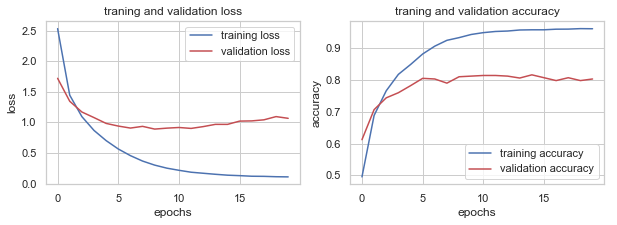

In [26]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], 'b-', label="training loss")
plt.plot(hist.history['val_loss'], 'r-', label="validation loss")
plt.title("traning and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['acc'], 'b-', label="training accuracy")
plt.plot(hist.history['val_acc'], 'r-', label="validation accuracy")
plt.title("traning and validation accuracy")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

epoch=9 이후부터 loss 증가하기 시작

In [27]:
model.predict(x_test) # 각 레이블 확률

array([[1.0151509e-06, 8.0516008e-07, 5.8397038e-09, ..., 4.2193182e-09,
        9.1127755e-10, 7.5278156e-10],
       [7.0463918e-04, 3.6226499e-03, 3.6523943e-07, ..., 2.1232090e-08,
        2.6907370e-09, 1.2357016e-05],
       [2.3480475e-02, 8.8643503e-01, 4.1861064e-04, ..., 9.7892234e-06,
        2.9751529e-06, 3.2499469e-05],
       ...,
       [2.5998710e-07, 1.2384307e-06, 6.4127583e-08, ..., 2.7333780e-09,
        1.2517641e-08, 1.3352761e-09],
       [2.6314093e-03, 1.3713804e-01, 3.4820207e-04, ..., 3.7772581e-05,
        1.4641201e-06, 2.4252465e-06],
       [7.5459371e-05, 7.2793984e-01, 1.9401535e-02, ..., 2.9364926e-07,
        2.2061060e-09, 1.4425336e-06]], dtype=float32)

In [28]:
prediction = model.predict(x_test)
np.argmax(prediction, axis=1) # 각 데이터 분류 : y_hat

array([ 3, 10,  1, ...,  3,  3,  1], dtype=int64)

### 만약 은닉층의 유닛이 레이블 갯수보다 적다면..?
- 병목현상 발생

In [29]:
model2 = models.Sequential()
model2.add(Dense(64, input_shape=(10000,), activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(46, activation='softmax'))
model2.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [30]:
model2.fit(x=x_train, y=y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 391us/step - loss: 3.1051 - acc: 0.4808 - val_loss: 2.4987 - val_acc: 0.5700
Epoch 2/20
7982/7982 [==============================] - 2s 306us/step - loss: 2.1010 - acc: 0.6178 - val_loss: 1.8423 - val_acc: 0.6430
Epoch 3/20
7982/7982 [==============================] - 2s 294us/step - loss: 1.5582 - acc: 0.6957 - val_loss: 1.5075 - val_acc: 0.6810
Epoch 4/20
7982/7982 [==============================] - 2s 293us/step - loss: 1.2633 - acc: 0.7424 - val_loss: 1.3656 - val_acc: 0.6970
Epoch 5/20
7982/7982 [==============================] - 2s 296us/step - loss: 1.0795 - acc: 0.7735 - val_loss: 1.2508 - val_acc: 0.7250
Epoch 6/20
7982/7982 [==============================] - 2s 299us/step - loss: 0.9457 - acc: 0.7964 - val_loss: 1.1954 - val_acc: 0.7350
Epoch 7/20
7982/7982 [==============================] - 3s 349us/step - loss: 0.8416 - acc: 0.8160 - val_loss: 1.1487 - val_acc: 0.7530


### 더 늘리면?

In [31]:
model3 = models.Sequential()
model3.add(Dense(64, input_shape=(10000,), activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(46, activation='softmax'))
model3.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model3.fit(x=x_train, y=y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 377us/step - loss: 2.5329 - acc: 0.5173 - val_loss: 1.6693 - val_acc: 0.6240
Epoch 2/9
7982/7982 [==============================] - 2s 312us/step - loss: 1.3791 - acc: 0.6982 - val_loss: 1.2701 - val_acc: 0.7160
Epoch 3/9
7982/7982 [==============================] - 3s 318us/step - loss: 1.0122 - acc: 0.7796 - val_loss: 1.0992 - val_acc: 0.7600
Epoch 4/9
7982/7982 [==============================] - 2s 313us/step - loss: 0.7885 - acc: 0.8302 - val_loss: 1.0137 - val_acc: 0.7850
Epoch 5/9
7982/7982 [==============================] - 2s 310us/step - loss: 0.6160 - acc: 0.8678 - val_loss: 0.9367 - val_acc: 0.8120
Epoch 6/9
7982/7982 [==============================] - 2s 306us/step - loss: 0.4773 - acc: 0.8985 - val_loss: 0.9237 - val_acc: 0.8180
Epoch 7/9
7982/7982 [==============================] - 2s 293us/step - loss: 0.3794 - acc: 0.9209 - val_loss: 0.8691 - val_acc: 0.8240
Epoch 8

In [32]:
model3.evaluate(x_test, y_test)

2246/2246 [==============================] - 1s 465us/step


[1.0241028262585905, 0.7804986643186129]

살짝 올라가네..ㅡㅡ

### 은닉층 3개 써보면?

In [34]:
model4 = models.Sequential()
model4.add(Dense(64, input_shape=(10000,), activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(46, activation='softmax'))
model4.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model4.fit(x=x_train, y=y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 398us/step - loss: 2.5957 - acc: 0.4964 - val_loss: 1.6869 - val_acc: 0.6270
Epoch 2/9
7982/7982 [==============================] - 2s 298us/step - loss: 1.4522 - acc: 0.6799 - val_loss: 1.3456 - val_acc: 0.6970
Epoch 3/9
7982/7982 [==============================] - 2s 306us/step - loss: 1.1318 - acc: 0.7334 - val_loss: 1.2032 - val_acc: 0.7330
Epoch 4/9
7982/7982 [==============================] - 2s 309us/step - loss: 0.9188 - acc: 0.7843 - val_loss: 1.0886 - val_acc: 0.7670
Epoch 5/9
7982/7982 [==============================] - 2s 300us/step - loss: 0.7203 - acc: 0.8354 - val_loss: 1.0355 - val_acc: 0.7670
Epoch 6/9
7982/7982 [==============================] - 2s 299us/step - loss: 0.5822 - acc: 0.8685 - val_loss: 1.0253 - val_acc: 0.7820
Epoch 7/9
7982/7982 [==============================] - 2s 300us/step - loss: 0.4579 - acc: 0.9025 - val_loss: 0.9835 - val_acc: 0.8020
Epoch 8